In [3]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def load_delay_data(logs_dir="logs"):
    """
    Load delay data from all method directories in the logs folder
    Returns a dictionary with method names as keys and their delay data organized by corruption type and severity
    """
    methods = ["baseline", "pbrs", "w-cdf", "w-bbse", "w-bbseods"]
    delay_data = {}
    
    for method in methods:
        method_dir = os.path.join(logs_dir, method, "tpr")
        if not os.path.exists(method_dir):
            continue
            
        # Find the results JSON file
        json_file = f"{method}_results.json"
        json_path = os.path.join(method_dir, json_file)
        
        if not os.path.exists(json_path):
            continue
            
        # Load the data
        with open(json_path, 'r') as f:
            data = json.load(f)
            
        # Organize data by corruption type and severity
        method_data = defaultdict(dict)
        for key, value in data.items():
            if '_s' in key:  # Only process severity-based entries
                corruption_type = key.split('_s')[0]
                severity = int(key.split('_s')[1])
                if value['avg_delay'] is not None:
                    method_data[corruption_type][severity] = value['avg_delay']
                
        delay_data[method] = dict(method_data)
    
    return delay_data

def plot_delays_by_corruption(logs_dir="logs", save_dir=None, layout='5x3'):
    """
    Create a single figure with subplots showing mean delay vs severity for each corruption type
    
    Args:
        logs_dir (str): Path to the logs directory
        save_dir (str, optional): Directory to save the plots. If None, plots are shown
        layout (str): Either '3x5' or '5x3' subplot layout
    """
    # Load the delay data
    delay_data = load_delay_data(logs_dir)
    
    # Get all corruption types from the first method
    first_method = next(iter(delay_data.values()))
    corruption_types = sorted(first_method.keys())
    
    # Set layout dimensions
    if layout == '3x5':
        n_rows, n_cols = 3, 5
        figsize = (15, 9)
    else:  # '5x3'
        n_rows, n_cols = 5, 3
        figsize = (12, 15)
    
    # Set up the figure with IEEE/ICML style
    plt.style.use('seaborn-paper')
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    # Define professional color scheme and markers
    colors = ['#0077BB', '#EE7733', '#009988', '#CC3311', '#33BBEE']
    markers = ['o', 's', '^', 'D', 'v']
    
    # Create a subplot for each corruption type
    for idx, corruption_type in enumerate(corruption_types):
        ax = axes[idx]
        
        # Plot each method's data
        for method_idx, (method, data) in enumerate(delay_data.items()):
            if corruption_type in data:
                severities = sorted(data[corruption_type].keys())
                delays = [data[corruption_type][s] for s in severities]
                ax.plot(severities, delays, 
                       marker=markers[method_idx],
                       color=colors[method_idx],
                       label=method, 
                       linewidth=1.5, 
                       markersize=5,
                       markeredgewidth=1,
                       markerfacecolor='white')
        
        # Customize the subplot
        ax.set_xlabel('Severity Level', fontsize=9)
        ax.set_ylabel('Mean Delay', fontsize=9)
        ax.set_title(f'{corruption_type.replace("_", " ").title()}', 
                    fontsize=10, 
                    pad=8)
        ax.grid(True, alpha=0.3, linestyle='-', which='both')
        ax.set_xticks(range(1, 6))
        ax.tick_params(axis='both', labelsize=8)
        
        # Add legend in top right corner
        ax.legend(fontsize=7, 
                 frameon=True,
                 fancybox=False,
                 edgecolor='black',
                 loc='upper right')
    
    # Remove any empty subplots
    for idx in range(len(corruption_types), len(axes)):
        fig.delaxes(axes[idx])
    
    # Adjust layout
    plt.tight_layout()
    
    # Save and show the plot
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        save_path = os.path.join(save_dir, f"all_corruption_delays_{layout}.pdf")
        plt.savefig(save_path, dpi=300, bbox_inches='tight', format='pdf')
        print(f"Plot saved to {save_path}")
    
    plt.show()
    plt.close()
    

def print_summary_statistics(logs_dir="logs"):
    """Print summary statistics for each corruption type and method"""
    delay_data = load_delay_data(logs_dir)
    
    # Get all corruption types
    first_method = next(iter(delay_data.values()))
    corruption_types = sorted(first_method.keys())
    
    for corruption_type in corruption_types:
        print(f"\nCorruption Type: {corruption_type.replace('_', ' ').title()}")
        print("-" * 50)
        
        for method, data in delay_data.items():
            if corruption_type in data:
                delays = list(data[corruption_type].values())
                print(f"\nMethod: {method}")
                print(f"Mean delay across severities: {np.mean(delays):.2f}")
                print(f"Min delay: {np.min(delays):.2f}")
                print(f"Max delay: {np.max(delays):.2f}")
                print(f"Delay values by severity: {data[corruption_type]}")


/var/folders/_5/brt6j91s2fj6xh_3nslyydv40000gn/T/ipykernel_4150/3287156281.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/_5/brt6j91s2fj6xh_3nslyydv40000gn/T/ipykernel_4150/1181269231.py:70: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


Plot saved to delay_plots/all_corruption_delays_5x3.pdf


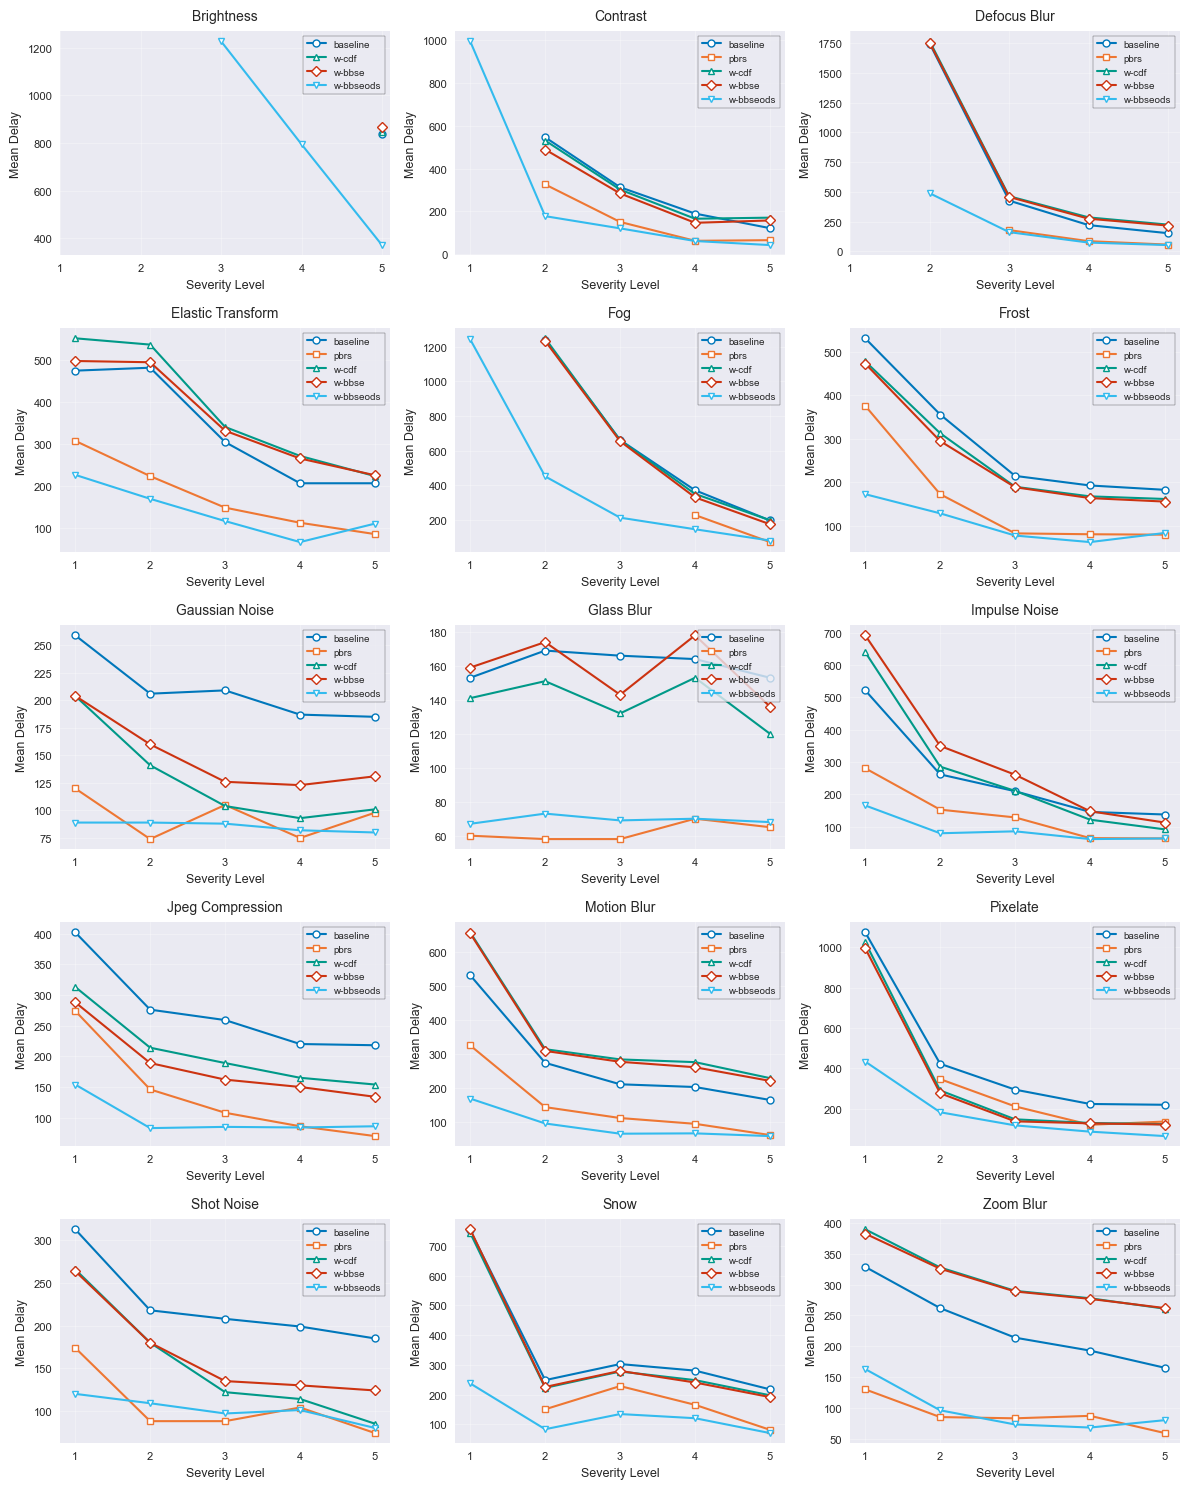


Corruption Type: Brightness
--------------------------------------------------

Method: baseline
Mean delay across severities: 836.00
Min delay: 836.00
Max delay: 836.00
Delay values by severity: {5: 836.0}

Method: w-cdf
Mean delay across severities: 845.00
Min delay: 845.00
Max delay: 845.00
Delay values by severity: {5: 845.0}

Method: w-bbse
Mean delay across severities: 869.00
Min delay: 869.00
Max delay: 869.00
Delay values by severity: {5: 869.0}

Method: w-bbseods
Mean delay across severities: 798.00
Min delay: 372.00
Max delay: 1227.00
Delay values by severity: {3: 1227.0, 4: 795.0, 5: 372.0}

Corruption Type: Contrast
--------------------------------------------------

Method: baseline
Mean delay across severities: 292.75
Min delay: 122.00
Max delay: 546.00
Delay values by severity: {2: 546.0, 3: 313.0, 4: 190.0, 5: 122.0}

Method: pbrs
Mean delay across severities: 151.50
Min delay: 63.00
Max delay: 326.00
Delay values by severity: {2: 326.0, 3: 151.0, 4: 63.0, 5: 66.0}

Me

In [4]:
if __name__ == "__main__":
    # Set the style for all plots
    plt.style.use('seaborn')
    
    # Create plots and save them to a directory
    plot_delays_by_corruption(save_dir="delay_plots")
    
    # Print summary statistics
    print_summary_statistics() 

In [3]:
import pandas as pd
def load_delay_data(logs_dir="logs"):
    """
    Load delay data from all method directories in the logs folder
    Returns a dictionary with method names as keys and their delay data organized by corruption type and severity
    """
    methods = ["baseline", "pbrs", "w-cdf", "w-bbse", "w-bbseods"]
    delay_data = {}
    
    for method in methods:
        method_dir = os.path.join(logs_dir, method, "tpr")
        if not os.path.exists(method_dir):
            continue
            
        # Find the results JSON file
        json_file = f"{method}_results.json"
        json_path = os.path.join(method_dir, json_file)
        
        if not os.path.exists(json_path):
            continue
            
        # Load the data
        with open(json_path, 'r') as f:
            data = json.load(f)
            
        # Organize data by corruption type and severity
        method_data = {}
        for key, value in data.items():
            if '_s' in key:  # Only process severity-based entries
                corruption_type = key.split('_s')[0]
                severity = int(key.split('_s')[1])
                method_data[(corruption_type, severity)] = value['avg_delay']
                
        delay_data[method] = method_data
    
    return delay_data

def create_delay_dataframe(logs_dir="logs"):
    """
    Create a pandas DataFrame with mean delays for each method, corruption type, and severity
    
    Returns:
        pd.DataFrame: DataFrame with columns [method, corruption_type, severity, mean_delay]
    """
    delay_data = load_delay_data(logs_dir)
    
    # Create lists to store the data
    data = []
    
    # Process each method's data
    for method, method_data in delay_data.items():
        for (corruption_type, severity), delay in method_data.items():
            data.append({
                'method': method,
                'corruption_type': corruption_type,
                'severity': severity,
                'mean_delay': delay
            })
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Sort the DataFrame
    df = df.sort_values(['corruption_type', 'method', 'severity'])
    
    return df

def save_delay_dataframe(df, output_path="delay_data.csv"):
    """
    Save the DataFrame to a CSV file and print summary statistics
    
    Args:
        df (pd.DataFrame): DataFrame containing delay data
        output_path (str): Path to save the CSV file
    """
    # Save to CSV
    df.to_csv(output_path, index=False)
    print(f"Data saved to {output_path}")
    
    # Print summary statistics
    print("\nSummary Statistics by Method:")
    print("-" * 50)
    method_stats = df.groupby('method')['mean_delay'].agg(['mean', 'min', 'max', 'std'])
    print(method_stats)
    
    print("\nSummary Statistics by Corruption Type:")
    print("-" * 50)
    corruption_stats = df.groupby('corruption_type')['mean_delay'].agg(['mean', 'min', 'max', 'std'])
    print(corruption_stats)
    
    # Create a pivot table for easy viewing
    pivot_table = df.pivot_table(
        values='mean_delay',
        index=['corruption_type', 'severity'],
        columns='method',
        aggfunc='mean'
    )
    
    # Save pivot table to CSV
    pivot_path = output_path.replace('.csv', '_pivot.csv')
    pivot_table.to_csv(pivot_path)
    print(f"\nPivot table saved to {pivot_path}")


In [4]:
if __name__ == "__main__":
    # Create the DataFrame
    df = create_delay_dataframe()
    
    # Save and print statistics
    save_delay_dataframe(df)
    
    # Display the first few rows of the DataFrame
    print("\nFirst few rows of the DataFrame:")
    print("-" * 50)
    print(df.head()) 

Data saved to delay_data.csv

Summary Statistics by Method:
--------------------------------------------------
                 mean     min     max         std
method                                           
baseline   329.338235   122.0  1748.0  272.024999
pbrs       132.532258    57.0   376.0   81.439250
w-bbse     280.676471 -1248.0  1755.0  373.892851
w-bbseods  175.444444    43.0  1243.0  238.455883
w-cdf      286.500000 -1181.0  1767.0  359.929699

Summary Statistics by Corruption Type:
--------------------------------------------------
                         mean     min     max         std
corruption_type                                          
brightness         824.000000   372.0  1227.0  272.089691
contrast           258.238095    43.0   994.0  225.877379
defocus_blur       478.736842    53.0  1767.0  584.728697
elastic_transform  278.640000    66.0   551.0  149.811237
fog                514.105263    73.0  1249.0  425.894209
frost              215.440000    63.0   53

In [5]:
import json, os, pandas as pd
from pathlib import Path

def collect_fpr_results(log_root: str = "logs") -> pd.DataFrame:
    """
    Scan <log_root>/**/fpr/*_results.json and return one dataframe

        index   : subset-size  (as ints)
        columns : <method>_mean   and   <method>_std

    Example
    -------
    >>> df = collect_fpr_results("logs")
    >>> print(df.head())
            pbrs_mean  pbrs_std  w-cdf_mean  w-cdf_std  w-bbse_mean  ...
    """
    records = []

    for json_file in Path(log_root).rglob("fpr/*_results.json"):
        method = json_file.stem.replace("_results", "")   # "pbrs", "w-cdf", ...
        with open(json_file, "r") as f:
            data = json.load(f)

        # the keys inside are strings like "1","2",… (subset sizes)
        for subset_size, stats in data.items():
            records.append(dict(
                subset = int(subset_size),
                method = method,
                mean   = float(stats["mean"]),
                std    = float(stats["std"]),
            ))

    # → long-form dataframe … pivot to wide
    df_long = pd.DataFrame.from_records(records)
    df_wide = (
        df_long
        .pivot(index="subset", columns="method", values=["mean", "std"])
        .sort_index(axis=1, level=1)        # nicer column order
        .sort_index()
    )

    # flatten the MultiIndex columns:  ("mean","pbrs") → "pbrs_mean"
    df_wide.columns = [f"{m}_{k}" for k, m in df_wide.columns]
    return df_wide


if __name__ == "__main__":
    df = collect_fpr_results("logs")      # adjust if your root folder differs
    print(df.head())

        baseline_mean  baseline_std  pbrs_mean  pbrs_std  w-bbse_mean  \
subset                                                                  
1            0.200000           0.0   0.360000       0.0     0.540000   
2            0.400000           0.0   0.406667       0.0     0.582222   
3            0.353333           0.0   0.280000       0.0     0.455000   
4            0.173333           0.0   0.133333       0.0     0.335238   
5            0.133333           0.0   0.033333       0.0     0.206349   

        w-bbse_std  w-bbseods_mean  w-bbseods_std  w-cdf_mean  w-cdf_std  
subset                                                                    
1         0.048990        0.040000       0.048990    0.640000   0.080000  
2         0.043090        0.000000       0.000000    0.555556   0.031427  
3         0.035978        0.000000       0.000000    0.385000   0.023214  
4         0.022857        0.000000       0.000000    0.251429   0.012196  
5         0.019114        0.000794    

In [6]:
df

,baseline_mean,baseline_std,pbrs_mean,pbrs_std,w-bbse_mean,w-bbse_std,w-bbseods_mean,w-bbseods_std,w-cdf_mean,w-cdf_std
subset,,,,,,,,,,
1,0.200000,0.0,0.360000,0.0,0.540000,0.048990,0.040000,0.048990,0.640000,0.080000
2,0.400000,0.0,0.406667,0.0,0.582222,0.043090,0.000000,0.000000,0.555556,0.031427
3,0.353333,0.0,0.280000,0.0,0.455000,0.035978,0.000000,0.000000,0.385000,0.023214
4,0.173333,0.0,0.133333,0.0,0.335238,0.022857,0.000000,0.000000,0.251429,0.012196
5,0.133333,0.0,0.033333,0.0,0.206349,0.019114,0.000794,0.001587,0.142857,0.016836
6,0.073333,0.0,0.020000,0.0,0.096190,0.025089,0.000000,0.000000,0.061905,0.019749
7,0.020000,0.0,0.000000,0.0,0.021667,0.004082,0.000000,0.000000,0.011667,0.004082
8,0.006667,0.0,0.000000,0.0,0.004444,0.008889,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
df.to_excel('false_positive.xlsx')